In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import folium
import json
import re
import scipy.stats as stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 1. 구 별 장애인 등록자 인구 분포 확인

In [21]:
# 서울시 장애인 등록자 인구 현황
disabled = pd.read_csv('[데이터] 구별 장애인 수.csv')
disabled_seoul = disabled[['자치구', '합계']].loc[3:]

disabled_seoul.reset_index(drop=True, inplace=True)

for i, data in enumerate(disabled_seoul['합계']):
      disabled_seoul['합계'][i] = data.replace(',', '')

disabled_seoul['합계']= disabled_seoul['합계'].astype('int')

disabled_seoul

,자치구,합계
0,종로구,6015
1,중구,5700
2,용산구,7960
3,성동구,11412
4,광진구,12353
5,동대문구,15701
6,중랑구,20394
7,성북구,17490
8,강북구,17441
9,도봉구,15436


In [22]:
# 서울시 행정구역 (구 단위) json 파일 불러오기
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

# 서울시 중심부의 위도, 경도로 map 만들기
map = folium.Map(location=[37.541, 126.986], zoom_start=11)

# Choropleth 레이어를 만들고, 맵 map에 추가
folium.Choropleth(
    geo_data = geo_json, 
    data = disabled_seoul,
    columns = ['자치구', '합계'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.2
).add_to(map)

map

### 2. 총 편의시설 개수 분포 확인

`여기서 '편의시설'은 주차장, 지하철, 관광편의시설, 장애인 도서관에 해당하는 모든 편의시설을 포함하여 전처리 진행함. 이 데이터를 바탕으로 분석 진행`

- 주차장의 경우 : 장애인이 주차할 수 있는 곳만 포함
- 지하철의 경우 : 같은 역이어도 다른 구에 해당하는 경우가 있어 두 가지 모두 반영함


In [26]:
# 서울시 장애인 편의시설 현황
df = pd.read_csv('[데이터] 장애인 편의시설 통합본 (주차장, 지하철, 관광편의시설, 장애인 도서관).csv')

# 구별 편의시설 갯수 세고, 딕셔너리 형태로 만들기
counts = df['담당구'].value_counts().to_dict()

# key 값, value 값으로 데이터 프레임 만들기
fac_counts = pd.DataFrame(list(counts.items()), columns = ['해당 구', '총 편의시설 개수'])
fac_counts

,해당 구,총 편의시설 개수
0,강남구,446
1,강서구,365
2,송파구,319
3,노원구,290
4,영등포구,272
5,은평구,263
6,구로구,251
7,강동구,241
8,마포구,240
9,성동구,233


In [27]:
## 총 편의시설 분포 확인

# 서울시 행정구역 (구 단위) json 파일 불러오기
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

# 서울시 중심부의 위도, 경도로 map 만들기
map = folium.Map(location=[37.541, 126.986], zoom_start=11)

# Choropleth 레이어를 만들고, 맵 map에 추가
folium.Choropleth(
    geo_data = geo_json, 
    data = fac_counts,
    columns = ['해당 구', '총 편의시설 개수'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.2
).add_to(map)

map

### 3. 구 별 장애인 등록자 수 이상치에 해당하는 구가 있는지 확인하고 편의시설 수 확인

In [23]:
# 한글 깨짐

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

{'whiskers': [<matplotlib.lines.Line2D at 0x2748cce2e80>,
 'caps': [<matplotlib.lines.Line2D at 0x2748ccd0f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2748cce2b20>],
 'medians': [<matplotlib.lines.Line2D at 0x2748cb2d7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2748cb2d3d0>],
 'means': []}

Text(0.5, 1.0, '장애인 등록자 수 이상치 확인')

([<matplotlib.axis.XTick at 0x2748cd0b0a0>], [Text(1, 0, '합계')])

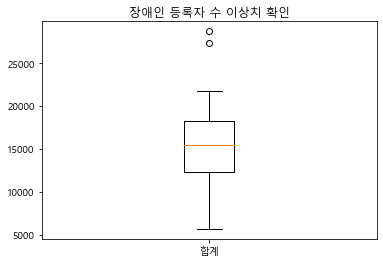

In [24]:
# 박스플롯으로 이상치 확인
plt.boxplot(disabled_seoul['합계'])
plt.title('장애인 등록자 수 이상치 확인')
plt.xticks([1], ['합계'])
plt.show()

In [25]:
# 이상치에 해당하는 데이터 인덱스 구하기
from collections import Counter

def get_outliers(df=None, column=None, weight=1.5):
    q_25 = np.percentile(df[column].values, 25)
    q_75 = np.percentile(df[column].values, 75)
    
    IQR = q_75 - q_25
    IQR_weight = IQR * weight
    
    lowest = q_25 - IQR_weight
    highest = q_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

outlier_idx = get_outliers(df = disabled_seoul, column = '합계', weight=1.5)

# 이상치에 해당하는 데이터 확인
disabled_out = pd.DataFrame(disabled_seoul.loc[outlier_idx])
disabled_out = disabled_out.reset_index(drop=True) # 인덱스 초기화
disabled_out = disabled_out.rename(columns={'합계':'인구 수'})    # 컬럼명 변경
disabled_out

,자치구,인구 수
0,노원구,27312
1,강서구,28727


In [28]:
# 장애인 등록자 수 인구 평균값, 총 편의시설 개수의 평균값과 이상치 값들 비교

# 순서대로 장애인 등록자수, 편의시설 개수의 평균
ds_mean = np.mean(disabled_seoul['합계'])
fac_mean = np.mean(fac_counts['총 편의시설 개수'])

# 이상치에 해당하는 구의 인구수, 편의시설 수, 평균치 결합
disabled_out.loc[:, '총 편의시설 수'] = [290, 365] # 편의시설 수 컬럼 추가
disabled_out.loc[2] = ['전체 자치구 평균', ds_mean, fac_mean] # 평균치 추가
disabled_out

,자치구,인구 수,총 편의시설 수
0,노원구,27312.0,290.00
1,강서구,28727.0,365.00
2,전체 자치구 평균,15767.6,236.36


<AxesSubplot:ylabel='자치구'>

<AxesSubplot:ylabel='자치구'>

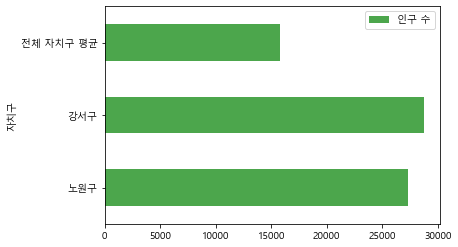

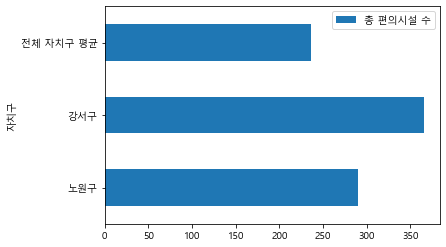

In [29]:
# 이상치와 평균치를 막대그래프로 비교
disabled_out.plot.barh(x='자치구', y='인구 수', color='g', alpha=0.7)
disabled_out.plot.barh(x='자치구', y='총 편의시설 수')

`장애인 등록자 수 이상치에 해당하는 '노원구'와 '강서구'의 인구수는 다른 자치구에 비해 많고, 그만큼 총 편의시설의 수도 많다는 것을 확인할 수 있음`

### 4. 그렇다면, 구 별로 장애인 등록자 수가 많을수록 편의시설도 많은가?

* 구 별로 장애인 등록자 수와 편의시설 수 사이의 상관관계 확인 (이상치 제거 후 확인)

`1) 장애인 등록자 수와 편의시설 수의 상관계수 값 확인 및 그래프 시각화`

In [35]:
# disabled_seoul, fac_counts 모두 해당 구의 가나다 순으로 정렬
disabled_seoul = disabled_seoul.sort_values(by='자치구').reset_index(drop=True)
fac_counts = fac_counts.sort_values(by='해당 구').reset_index(drop=True)

# 하나의 데이터프레임으로 만들기
df_corr = pd.DataFrame(disabled_seoul)
df_corr.loc[:, '총 편의시설 수'] = fac_counts['총 편의시설 개수']

# 이상치 제거
df_corr = df_corr.drop(3)
df_corr = df_corr.drop(8)

# 이상치 제거 후 index reset
df_corr = df_corr.reset_index(drop=True)

# 장애인 등록자 수와 편의시설 수의 상관계수
correlation = df_corr['합계'].corr(df_corr['총 편의시설 수'])
correlation

0.19683002471614813

`장애인 등록자 수와 편의시설 수의 상관계수는 0.2635으로, 양의 상관관계를 가지고 있다. 하지만, 상관계수의 절댓값이 0.26 수준에 머물러, 상관관계는 낮다고 볼 수 있다. 즉, 장애인 등록자 수와 총 편의시설 수는 상관관계가 낮다.`

Text(0.5, 1.0, '장애인 등록자 수와 편의시설 수 산점도')

Text(0.5, 0, '구 별 인구수')

Text(0, 0.5, '구 별 총 편의시설 개수')

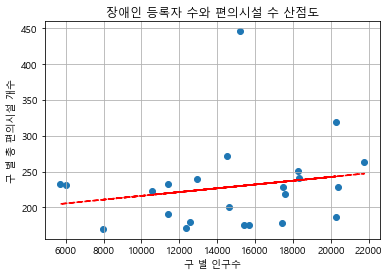

In [33]:
# 상관관계 : 산점도, 추세선 그리기
z = np.polyfit(df_corr['합계'], df_corr['총 편의시설 수'], 1)
p = np.poly1d(z)  # 1차원 다항식에 대한 연산을 캡슐화

plt.title('장애인 등록자 수와 편의시설 수 산점도')
plt.scatter(df_corr['합계'], df_corr['총 편의시설 수'])    # 산점도
plt.plot(df_corr['합계'], p(df_corr['합계']), 'r--')       # 추세선
plt.xlabel('구 별 인구수')
plt.ylabel('구 별 총 편의시설 개수')
plt.grid()  # 격자 보이기
plt.show()

`2) 가설검정`

- 귀무 : 장애인 등록자 수와 총 편의시설 수 사이에는 상관관계가 없다.
- 대립 : 장애인 등록자 수와 총 편의시설 수 사이에는 상관관계가 있다.

- `t 검정통계량 => p-value <= 0.05` : 대립가설 채택 -> 상관계수를 활용할 수 있다
- `공분산` : x와 y의 선형성 => 이 값을 활용해서 상관계수를 구함 (상관계수 구하기 이전 단계에 넣기)

In [34]:
## 상관관계 분석하려면 scipy 패키지 사용 (스피어만, 켄달은 순서형에 사용)

# 피어슨 상관계수 검정 (괄호 안에는 순서대로 상관계수, p-value)
corr = stats.pearsonr(df_corr['합계'], df_corr['총 편의시설 수'])
corr

(0.19683002471614813, 0.3680280926524239)

`피어쓴 상관계수 검정결과, p-value의 값이 0.203으로 유의수준 0.05보다 크다. 따라서, 귀무가설을 기각하지 않는다.